In [17]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline




In [4]:
% pwd
% cd /home/ubuntu/project1

/home/ubuntu/project1


In [5]:
image = mpimg.imread('test.jpg')
print ('This image is:',type(image),'with dimesions:',image.shape)

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


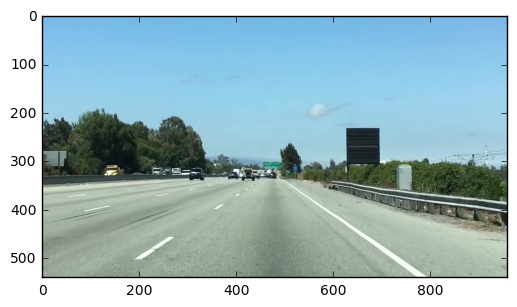

In [21]:
plt.imshow(image)

In [6]:
#wrong type
#image = mpimg.imread('test.jpg')
#print ('This image is:'+type(image)+'with dimesions:'+image.shape)

TypeError: Can't convert 'type' object to str implicitly

In [13]:
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)


In [14]:
#another version
ysize = image.shape[0]
xsize = image.\
shape[1]
region_select = np.copy(image)


In [10]:
left_bottom = [0,539]
right_bottom = [900,300]
apex = [400,0]

fit_left = np.polyfit((left_bottom[0],apex[0]),\
                     (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]),
                       (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), 
                        (left_bottom[1], right_bottom[1]), 1)
#np.polyfit,1

In [15]:
XX,YY = np.meshgrid(np.arange(0,xsize),np.arange(0,ysize))
region_thresholds = (YY> (XX*fit_left[0]+fit_left[1]))&\
(YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
region_select[region_thresholds] = [255, 0, 0]

In [23]:
print(np.arange(0,xsize/100))
# ~ inverse


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


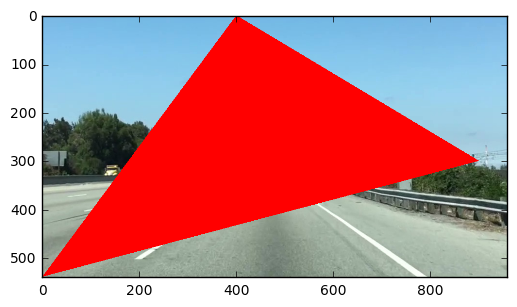

In [18]:
plt.imshow(region_select)

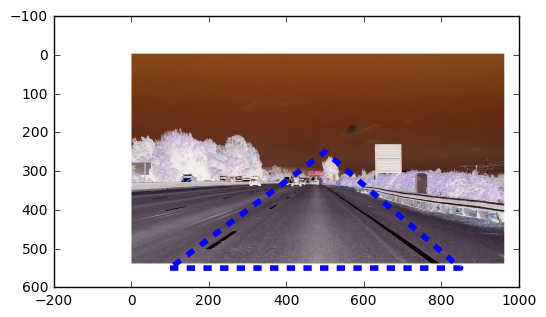

In [33]:
#the result is different with 'test.png' file
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image and print out some stats
# Note: in the previous example we were reading a .jpg 
# Here we read a .png and convert to 0,255 bytescale
image = (mpimg.imread('test.jpg')*255).astype('uint8')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION 
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [100, 550]
right_bottom = [850, 550]
apex = [500, 250]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
                    
# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

# Display the image and show region and color selections
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)


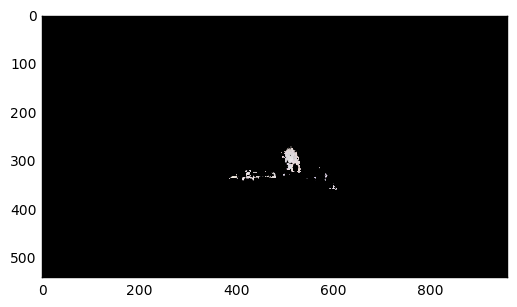

In [30]:
plt.imshow(color_select)




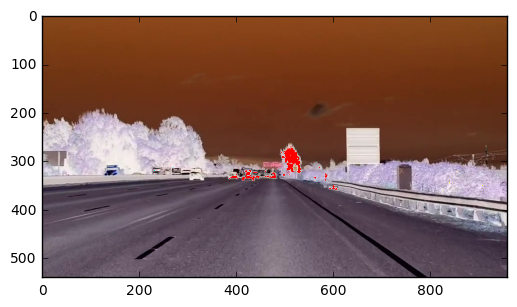

In [31]:
plt.imshow(line_image)

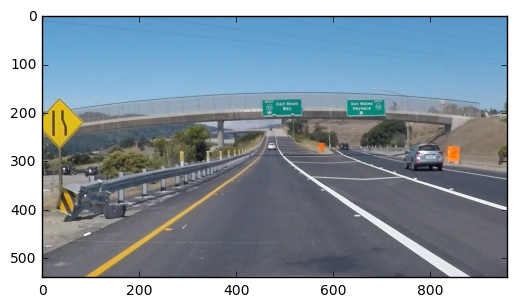

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread('exit-ramp.jpg')
plt.imshow(image)

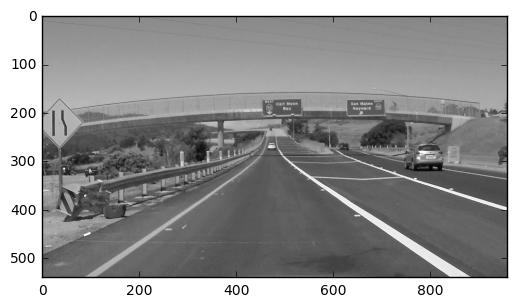

In [36]:
import cv2  #bringing in OpenCV libraries
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #grayscale conversion
plt.imshow(gray, 'gray')

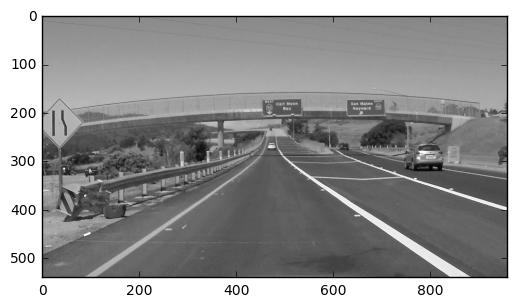

In [37]:
#same code
import cv2  #bringing in OpenCV libraries
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #grayscale conversion
plt.imshow(gray, cmap='gray')

The algorithm will first detect strong edge (strong gradient) pixels above the high_threshold, and reject pixels below the low_threshold. Next, pixels with values between the low_threshold and high_threshold will be included as long as they are connected to strong edges. The output edges is a binary image with white pixels tracing out the detected edges and black everywhere else. See the OpenCV Canny Docs for more details.
You can choose the kernel_size for Gaussian smoothing to be any odd number. A larger kernel_size implies averaging, or smoothing, over a larger area. The example in the previous lesson was kernel_size = 3.

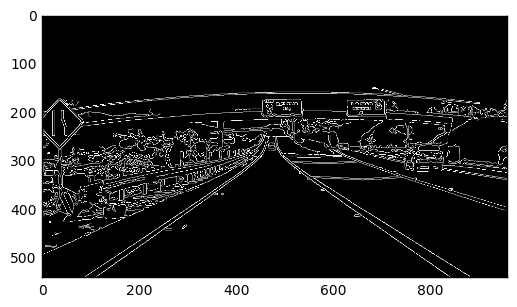

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in the image and convert to grayscale
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
# Note: this step is optional as cv2.Canny() applies a 5x5 Gaussian internally
kernel_size = 3
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

# Define parameters for Canny and run it
# NOTE: if you try running this code you might want to change these!
low_threshold = 1
high_threshold = 120
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r')

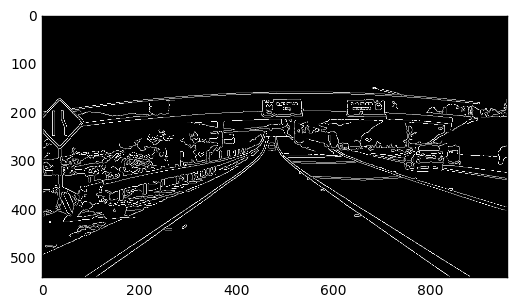

In [42]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in the image and convert to grayscale
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
# Note: this step is optional as cv2.Canny() applies a 5x5 Gaussian internally
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

# Define parameters for Canny and run it
# NOTE: if you try running this code you might want to change these!
low_threshold = 1
high_threshold = 120
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r')

In this case, we are operating on the image edges (the output from Canny) and the output from HoughLinesP will be lines, which will simply be an array containing the endpoints (x1, y1, x2, y2) of all line segments detected by the transform operation. The other parameters define just what kind of line segments we're looking for.

First off, rho and theta are the distance and angular resolution of our grid in Hough space. Remember that, in Hough space, we have a grid laid out along the (Θ, ρ) axis. You need to specify rho in units of pixels and theta in units of radians.

So, what are reasonable values? Well, rho takes a minimum value of 1, and a reasonable starting place for theta is 1 degree (pi/180 in radians). Scale these values up to be more flexible in your definition of what constitutes a line.

The threshold parameter specifies the minimum number of votes (intersections in a given grid cell) a candidate line needs to have to make it into the output. The empty np.array([]) is just a placeholder, no need to change it. min_line_length is the minimum length of a line (in pixels) that you will accept in the output, and max_line_gap is the maximum distance (again, in pixels) between segments that you will allow to be connected into a single line. You can then iterate through your output lines and draw them onto the image to see what you got!


 you'll get a chance to use a quadrilateral region mask using the cv2.fillPoly() function (keep in mind though, you could use this same method to mask an arbitrarily complex polygon region). 

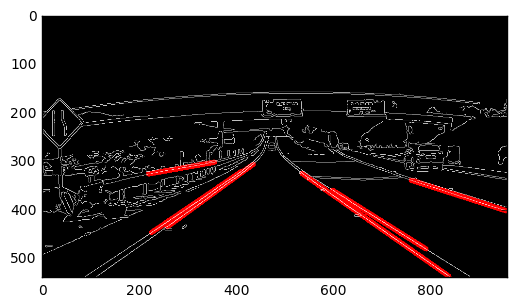

In [51]:
-


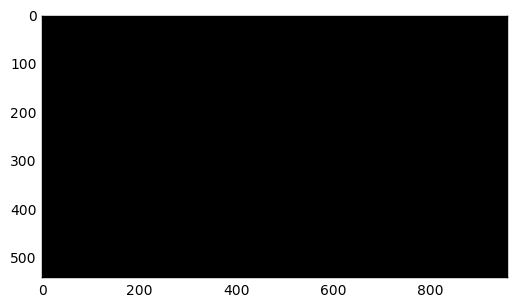

In [49]:
line_image = np.copy(image)*0
plt.imshow(line_image)

In [ ]:
masked_edges = cv2.bitwise_and(edges, mask)
plt.imshow(line_image)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


# Read in and grayscale the image
# Note: in the previous example we were reading a .jpg 
# Here we read a .png and convert to 0,255 bytescale
image = (mpimg.imread('exit-ramp.jpg')*255).astype('uint8')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15    # minimum number of votes (intersections in Hough grid cell)
min_line_length = 40#minimum number of pixels making up a line
max_line_gap = 20   # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(lines_edges)
